In [2]:
! python --version

Python 3.10.16


In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import HTML

In [4]:
directory = 'NZ Data/DTU Data/data/'
entries = os.listdir(directory)
entries_new = [e.split('_')[0] for e in entries] #without extension and so on.
# Define a color palette for different sheets

sheet_colors = {
    'Kokpanna1': 'tab:blue',
    'Kokpanna2': 'tab:red',
    'Kokpanna4': 'tab:green',
    'Kokpanna5': 'k',  # Black
}

sheet_names=[]
counter=0

data_dict = {}
for e, path in tqdm(zip(entries_new, entries), desc='Data files read'):
    data_dict[e] = pd.read_excel(os.path.join(directory, path))
    # Clean data by replacing "(null)" with NaN
    data_dict[e] = data_dict[e].replace("(null)", float("NaN"))

    # Convert the 'Time' column to datetime
    data_dict[e]['Time'] = pd.to_datetime(data_dict[e]['Time'], format='%d-%m-%Y %H:%M')

    # Create subplots for each column
    
    sns.set_style('whitegrid')
    #color= sheet_colors[sheet]


Data files read: 0it [00:00, ?it/s]C:\Users\morebo\AppData\Local\Temp\ipykernel_25172\3576071114.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_dict[e] = data_dict[e].replace("(null)", float("NaN"))
Data files read: 1it [00:49, 49.12s/it]C:\Users\morebo\AppData\Local\Temp\ipykernel_25172\3576071114.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_dict[e] = data_dict[e].replace("(null)", float("NaN"))
Data files read: 2it [01:13, 34.83s/it]C:\Users\morebo\AppData\Local\Temp\ipykernel_25172\3576071114.py:20: Futu

In [5]:
columns = data_dict[entries_new[0]].keys()
columns_to_plot = columns[1:]
colors = ['tab:blue', 'tab:red', 'tab:green', 'k']

In [6]:
data_list = [data_dict[e] for e in entries_new]

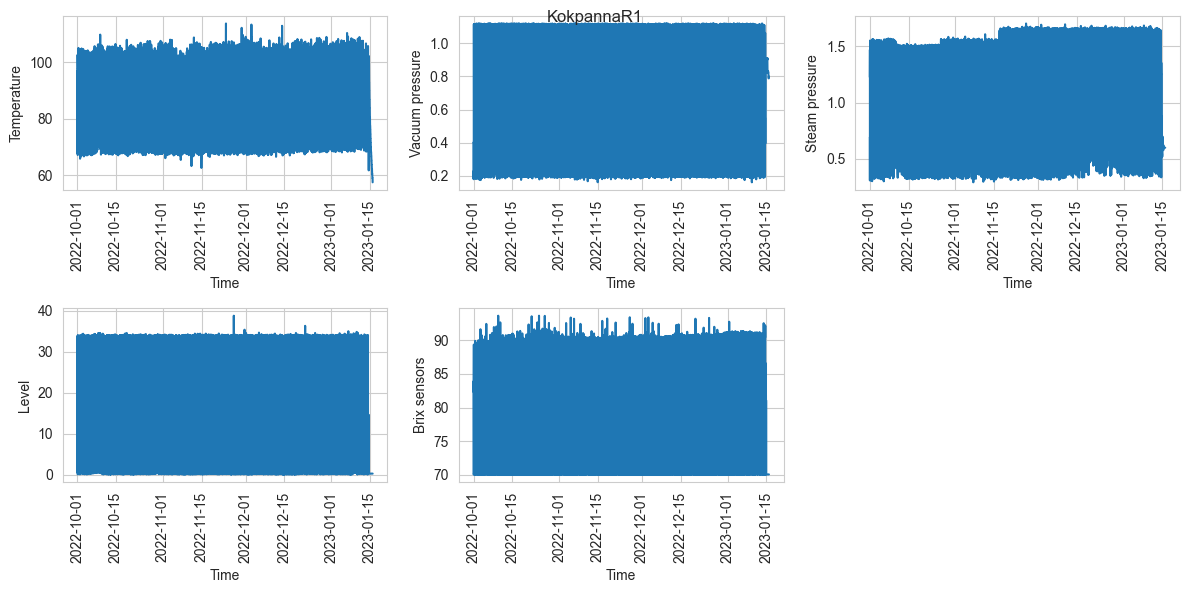

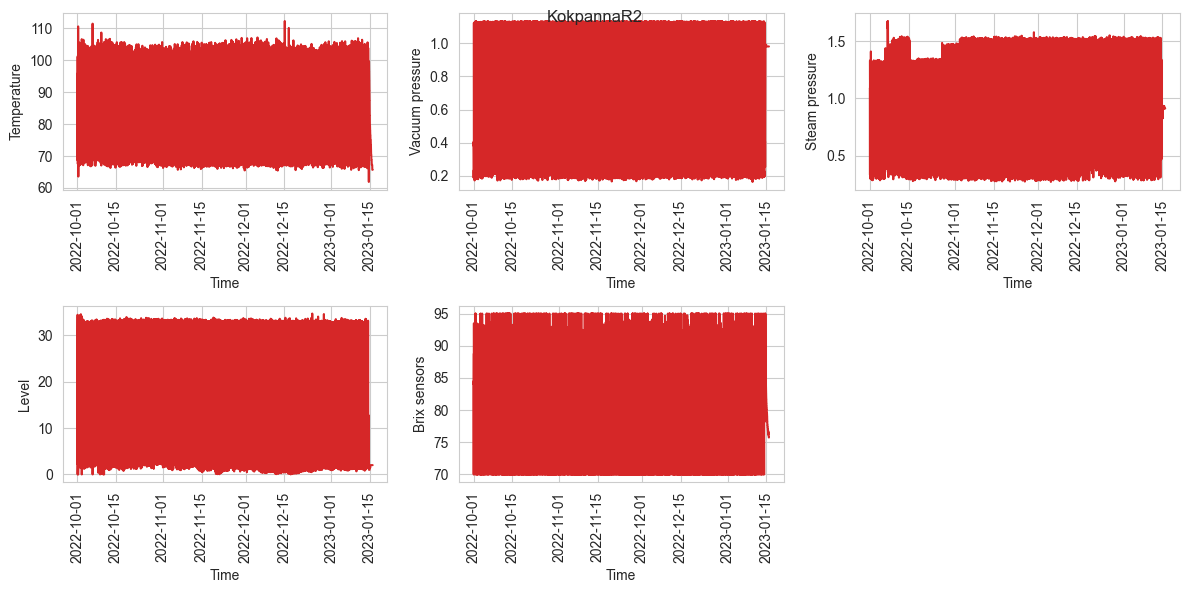

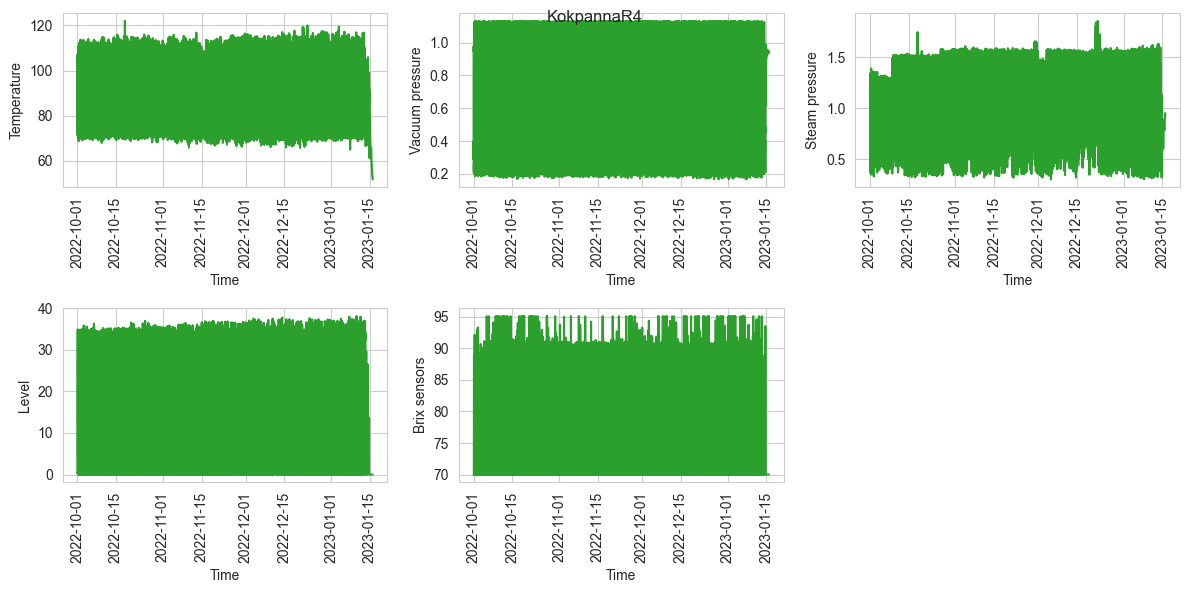

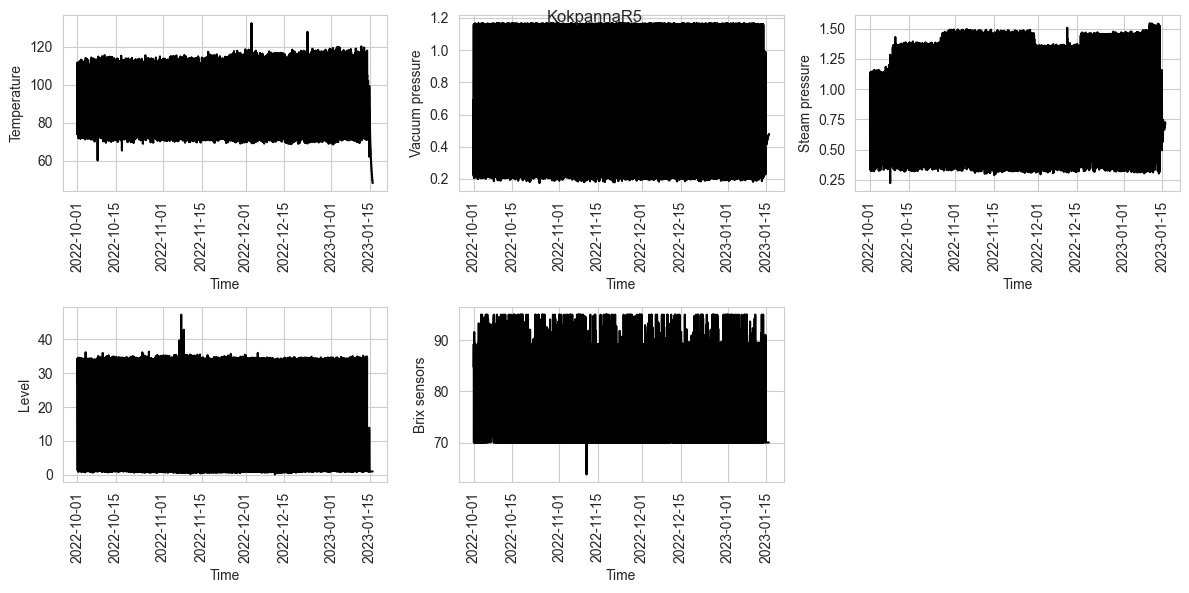

In [7]:
for index, e in enumerate(entries_new):
    plt.figure(figsize=(12, 6))
    for c, col in enumerate(columns_to_plot):
        plt.subplot(2, 3, c+1)
        plt.plot(data_list[index]['Time'], data_list[index][col], color=colors[index])
        plt.xticks(rotation=90)
        plt.xlabel('Time')
        plt.ylabel(col)
    plt.tight_layout()
        
    plt.suptitle(e)

In [39]:
# Assuming data_list is your list of DataFrames
# Initialize an empty dictionary to store the OWP DataFrames for each tank
OWP = {}

# Iterate over each DataFrame in data_list
for index, df in enumerate(data_list):
    # Filter rows based on pressure between 0.15 and 0.35
    owp_df = df[(df['Vacuum pressure'] >= 0.15) & (df['Vacuum pressure'] <= 0.35)]
    
    # Store the filtered DataFrame in the dictionary with the tank index as the key
    OWP[index] = owp_df

In [40]:
import datetime

start_time = datetime.datetime(2022, 10, 1)
end_time = datetime.datetime(2023, 1, 15)

OWPT = OWP[3].loc[(OWP[3]['Time'] >= start_time) & (OWP[3]['Time'] <= end_time)]

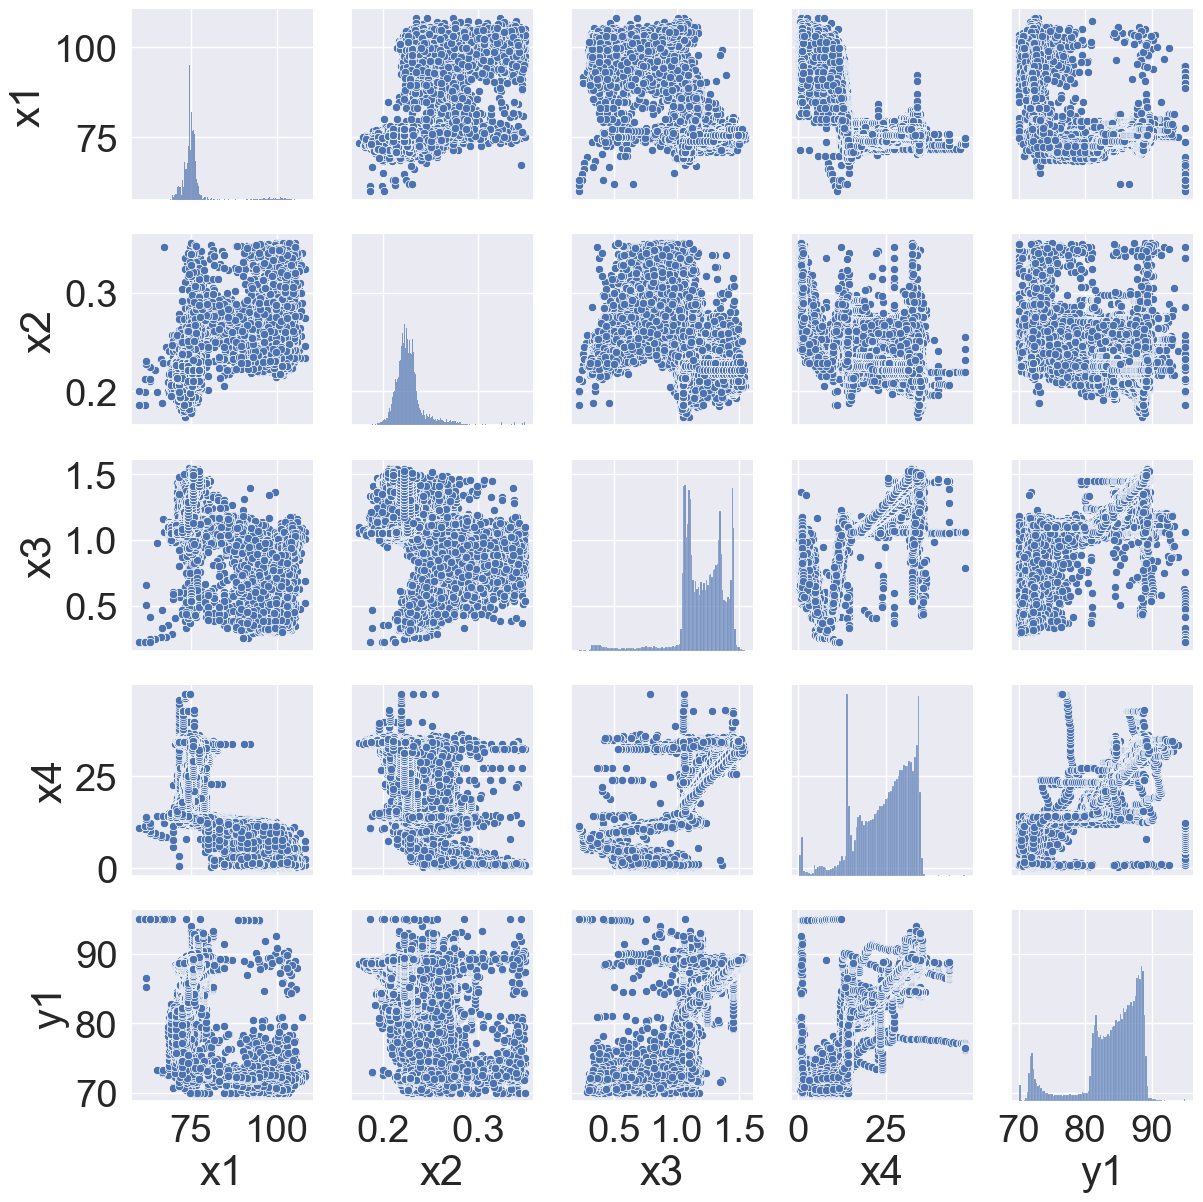

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size and font scale
sns.set(rc={'figure.figsize': (12, 8)})
sns.set(font_scale=2.5)

# Create the pairplot
plot = sns.pairplot(OWPT)

# Set custom labels for the axes
plot.axes[0, 0].set_ylabel('x1')
plot.axes[1, 0].set_ylabel('x2')
plot.axes[2, 0].set_ylabel('x3')
plot.axes[3, 0].set_ylabel('x4')
plot.axes[4, 0].set_ylabel('y1')

# Set custom labels for x-axes
plot.axes[4, 0].set_xlabel('x1')
plot.axes[4, 1].set_xlabel('x2')
plot.axes[4, 2].set_xlabel('x3')
plot.axes[4, 3].set_xlabel('x4')
plot.axes[4, 4].set_xlabel('y1')

# Show the plot
plt.show()


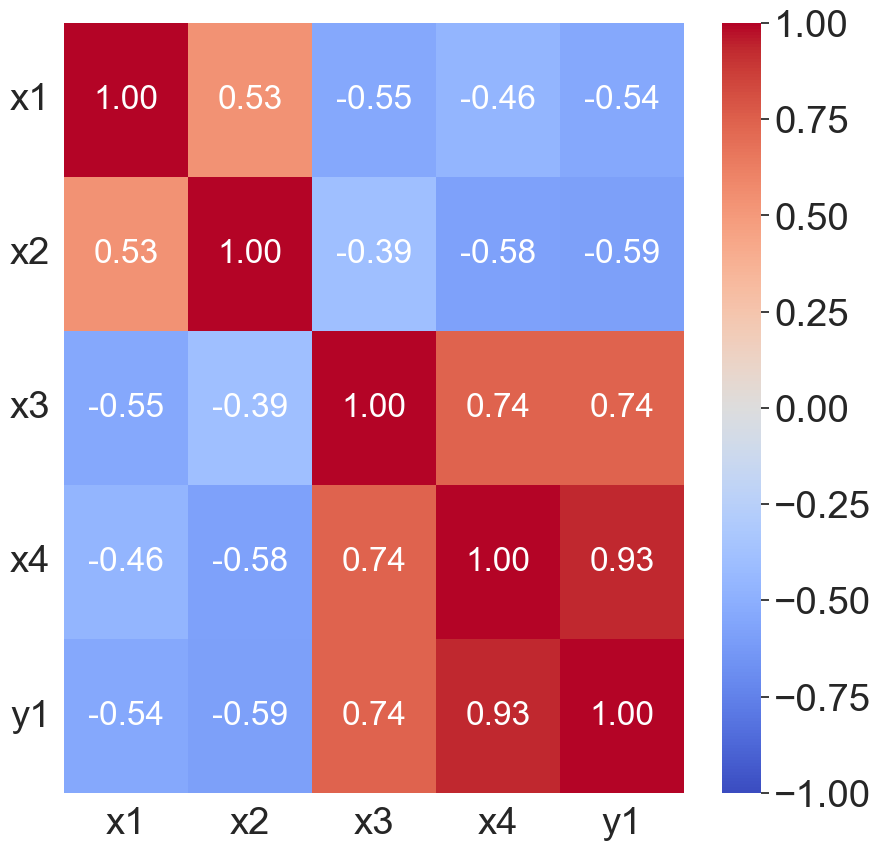

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Excluding 'Time' column
columns_to_exclude = ['Time']

# Filter the dataframe to exclude the specified columns
filtered_OWPT = OWPT.drop(columns=columns_to_exclude, errors='ignore')

# Calculate the correlation matrix for the filtered dataframe
CM_OWPT = filtered_OWPT.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(CM_OWPT, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, annot_kws={"size": 24,"color": "white"})

# Set custom labels for both x-axis and y-axis
new_labels = ['x1', 'x2', 'x3', 'x4', 'y1']
heatmap.set_xticklabels(new_labels, rotation=0)
heatmap.set_yticklabels(new_labels)

# Set font scale
sns.set(font_scale=2.5)

plt.show()


In [43]:
OWPT= OWPT.reset_index()

In [44]:
#BDP: Batch Data Base Pressure
Bench = OWPT['Time'].diff()
batch_change_indices = OWPT.index[Bench > pd.Timedelta(minutes=1)]
BDP = []
start_idx = 0
for idx in batch_change_indices:
    BDP.append(OWPT.iloc[start_idx:idx])
    start_idx = idx
BDP.append(OWPT.iloc[start_idx:])

In [ ]:
HTML(BDP[0] .to_html(index=False))

In [45]:
#OWPTB: Operating Window Pressure Based Time Frame with Batch number
OWPTB = pd.concat(BDP, ignore_index=True)

for i, df in enumerate(BDP):
    BDP[i] = df.copy()
    BDP[i].loc[:, 'Batch'] = i

OWPTB = pd.concat(BDP, ignore_index=True)

In [ ]:
HTML(OWPTB .to_html(index=False))

In [ ]:
OWPTB.to_excel('OWPTB.xlsx', index=True)

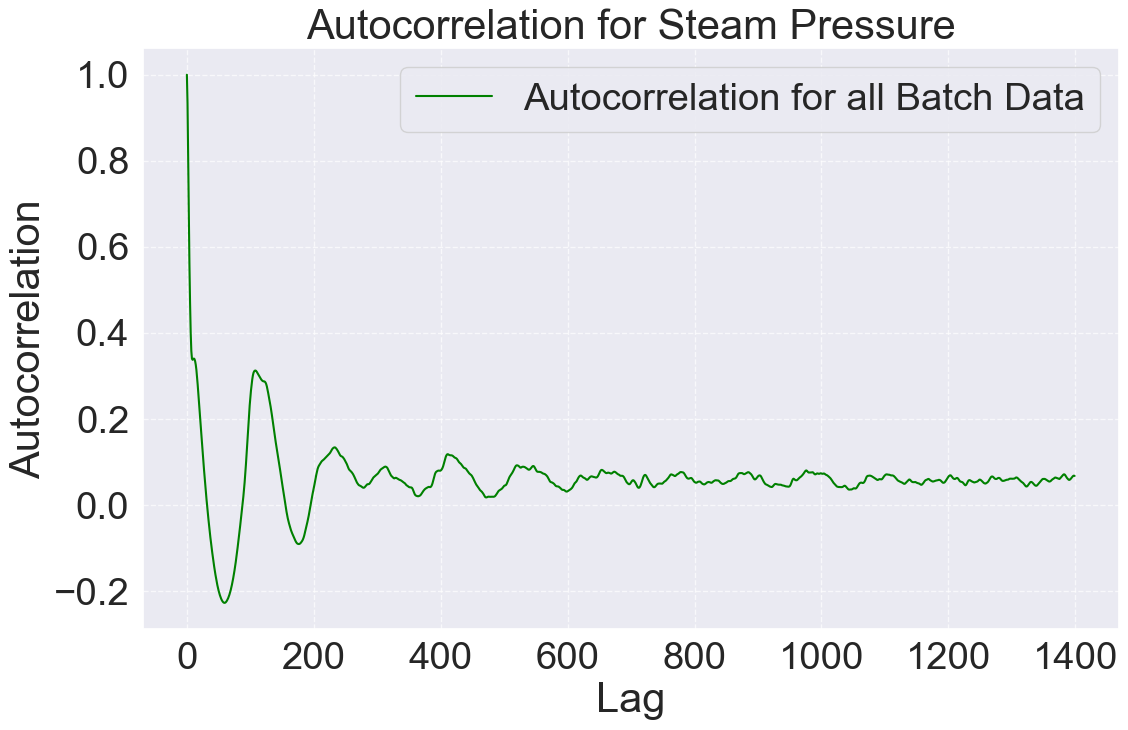

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Combine all batches into one dataset
combined_data = OWPTB['Steam pressure'].copy()

# Set the maximum lag
max_lag = 1400

# Calculate autocorrelation for the combined dataset
autocorr_values_combined = [combined_data.autocorr(lag=l) for l in range(max_lag)]

# Plot the autocorrelation for the combined dataset
plt.figure(figsize=(12, 8))
plt.plot(np.arange(max_lag), autocorr_values_combined, label='Autocorrelation for all Batch Data', color='green')

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation for Steam Pressure')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Combine all batches into one dataset
combined_data = OWPTB['Level'].copy()

# Set the maximum lag
max_lag = 1400

# Calculate autocorrelation for the combined dataset
autocorr_values_combined = [combined_data.autocorr(lag=l) for l in range(max_lag)]

# Plot the autocorrelation for the combined dataset
plt.figure(figsize=(12, 8))
plt.plot(np.arange(max_lag), autocorr_values_combined, label='Autocorrelation for all Batch Data', color='green')

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation for Level')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Combine all batches into one dataset
combined_data = OWPTB['Brix sensors'].copy()

# Set the maximum lag
max_lag = 1400

# Calculate autocorrelation for the combined dataset
autocorr_values_combined = [combined_data.autocorr(lag=l) for l in range(max_lag)]

# Plot the autocorrelation for the combined dataset
plt.figure(figsize=(12, 8))
plt.plot(np.arange(max_lag), autocorr_values_combined, label='Autocorrelation for all Batch Data', color='green')

# Set all font sizes to 20

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Lag', fontsize=30)
plt.ylabel('Autocorrelation', fontsize=30)
plt.title('Autocorrelation for Brix Sensor', fontsize=30)
plt.legend(fontsize=30)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
# Add a black border around the plot
plt.gca().spines['top'].set_color('black')
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['right'].set_color('black')
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['left'].set_linewidth(1)
plt.show()


In [ ]:
!pip show tensorflow


In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming OWPTB is your dataset and 'Level' is the feature you want to predict
data = OWPTB[['Level']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create time series data with lookback
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# Define the lookback window
look_back = 10

# Create the time series dataset
X, y = create_dataset(data_scaled, look_back)

# Reshape the input data for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test[:1400], label='Actual')
plt.plot(y_pred[:1400], label='Predicted', linestyle='dashed')
plt.title('LSTM Analysis for Level')
plt.xlabel('Time')
plt.ylabel('Level')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Combine all batches into one dataset
combined_data = OWPTB['Brix sensors'].copy()

# Set the maximum lag
max_lag = 1400

# Calculate autocorrelation for the combined dataset
autocorr_values_combined = [combined_data.autocorr(lag=l) for l in range(max_lag)]

# Plot the autocorrelation for the combined dataset
plt.figure(figsize=(12, 8))
plt.plot(np.arange(max_lag), autocorr_values_combined, label='Autocorrelation for all Batch Data', color='green')

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation for Brix senssors')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# LSTM
    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming OWPTB is your dataset and 'Brix sensors' is the feature you want to predict
data = OWPTB[['Brix sensors']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create time series data with lookback
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# Define the lookback window
look_back = 10

# Create the time series dataset
X, y = create_dataset(data_scaled, look_back)

# Reshape the input data for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Quantitative Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test[:1400], label='Actual')
plt.plot(y_pred[:1400], label='Predicted', linestyle='dashed')
plt.title('LSTM Analysis for Brix sensors')
plt.xlabel('Time')
plt.ylabel('Brix sensors')
plt.legend(loc='lower right')
plt.show()



# LSTM Basic Model

In [ ]:
#Based on Level and Steam pressure
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from scipy.stats import norm
import seaborn as sns

# Assuming OWPTB is your dataset
# Extract the relevant features
data = OWPTB[['Brix sensors', 'Level', 'Steam pressure']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create time series data with lookback
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 1:])  # Features from index 1 onwards
        y.append(dataset[i + look_back, 0])  # Target 'Brix sensors'
    return np.array(X), np.array(y)

# Define the lookback window
look_back = 10

# Create the time series dataset
X, y = create_dataset(data_scaled, look_back)

# Reshape the input data for LSTM
# X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))

# Split the data into training and testing sets
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Build the LSTM model with added complexity and regularization
model = Sequential()
model.add(LSTM(units=16, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(LSTM(units=16, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=16))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop])

# Make predictions on the test set
y_pred = model.predict(X_test).reshape(-1)
y_pred_3d = np.zeros(shape=(y_pred.shape[0], 3))
y_pred_3d[:, 0] = y_pred.copy()
y_pred = y_pred_3d
y_pred = scaler.inverse_transform(y_pred)[:, 0]

y_test_3d = np.zeros(shape=(y_test.shape[0], 3))
y_test_3d[:, 0] = y_test.copy()
y_test= y_test_3d
y_test = scaler.inverse_transform(y_test)[:, 0]

# Quantitative Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'MAPE: {mape:.2f}')


# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='dashed')
plt.title('LSTM Analysis for Brix sensors with Level and Steam pressure')
plt.xlabel('Time')
plt.ylabel('Brix sensors')
plt.legend()
plt.show()

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Calculate prediction error
error_lstm = y_test.flatten() - y_pred.flatten()

# Plotting the histogram
plt.figure(figsize=(8, 6))
sns.histplot(error_lstm, bins=20, kde=True, color='purple', stat='density')

# Calculate mean and standard deviation of the error
mean_error_lstm = np.mean(error_lstm)
std_error_lstm = np.std(error_lstm)

# Generate values for Gaussian curve
x = np.linspace(-10, 10, 100)
pdf = norm.pdf(x, mean_error_lstm, std_error_lstm)  # Gaussian distribution

# Plot Gaussian distribution curve
plt.plot(x, pdf, 'b-', linewidth=2, label='Gaussian Distribution')

# Annotate with mean and standard deviation
plt.text(0.95, 0.85, f'Mean Error: {mean_error_lstm:.2f}', fontsize=20, ha='right', transform=plt.gca().transAxes)
plt.text(0.95, 0.80, f'Standard Deviation: {std_error_lstm:.2f}', fontsize=20, ha='right', transform=plt.gca().transAxes)

plt.xlim(-10, 10)  # Set x-axis limit from -10 to 10
plt.title('LSTM Prediction Error Histogram', fontsize=20)
plt.xlabel('Prediction Error', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()

# LSTM Model 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import norm
import seaborn as sns

# Assuming OWPTB is your dataset
# Extract the relevant features
data = OWPTB[['Brix sensors', 'Level', 'Steam pressure', 'Vacuum pressure']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Define the lookback window
look_back = 10

# Function to create time series data with lookback
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), :])  # All features
        y.append(dataset[i + look_back, 0])  # Target 'Brix sensors'
    return np.array(X), np.array(y)

# Create the time series dataset
X, y = create_dataset(data_scaled, look_back)

# Split the data into training and testing sets
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=16, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=16, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=16))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop])

# Make predictions on the test set
y_pred_lstm = model_lstm.predict(X_test)

# Inverse transform y_pred_lstm
y_pred_lstm = scaler.inverse_transform(np.concatenate((y_pred_lstm, X_test[:, -1, 1:]), axis=1))[:, 0]

# Inverse transform y_test_lstm
y_test_lstm = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

# Quantitative Evaluation for LSTM
mse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test_lstm, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test_lstm, y_pred_lstm)
mape_lstm = np.mean(np.abs((y_test_lstm - y_pred_lstm) / y_test_lstm)) * 100

print(f'LSTM Model Metrics:')
print(f'Mean Squared Error (MSE): {mse_lstm:.2f}')
print(f'Mean Absolute Error (MAE): {mae_lstm:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_lstm:.2f}')
print(f'R-squared (R2): {r2_lstm:.2f}')
print(f'MAPE: {mape_lstm:.2f}')

# Plot training loss for LSTM
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('LSTM Training Loss')
plt.show()

# Calculate prediction error for LSTM
error_lstm = y_test_lstm - y_pred_lstm

# Plotting the histogram for LSTM prediction error
plt.figure(figsize=(8, 6))
sns.histplot(error_lstm, bins=20, kde=True, color='purple', stat='density')

# Calculate mean and standard deviation of the error for LSTM
mean_error_lstm = np.mean(error_lstm)
std_error_lstm = np.std(error_lstm)

# Generate values for Gaussian curve
x = np.linspace(-10, 10, 100)
pdf = norm.pdf(x, mean_error_lstm, std_error_lstm)  # Gaussian distribution

# Plot Gaussian distribution curve for LSTM
plt.plot(x, pdf, 'b-', linewidth=2, label='Gaussian Distribution')

# Annotate with mean and standard deviation for LSTM
plt.text(0.95, 0.85, f'Mean Error: {mean_error_lstm:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)
plt.text(0.95, 0.80, f'Standard Deviation: {std_error_lstm:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)

plt.xlim(-10, 10)  # Set x-axis limit from -10 to 10
plt.title('LSTM Prediction Error Histogram', fontsize=15)
plt.xlabel('Prediction Error', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()


# LSTM Model 2

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import norm
import seaborn as sns
from sklearn.model_selection import train_test_split

# Assuming OWPTB is your dataset
# Extract the relevant features
data = OWPTB[['Brix sensors', 'Steam pressure', 'Vacuum pressure']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create time series data with lookback
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 1:])  # Features from index 1 onwards
        y.append(dataset[i + look_back, 0])  # Target 'Brix sensors'
    return np.array(X), np.array(y)

# Define the lookback window
look_back = 10

# Create the time series dataset
X, y = create_dataset(data_scaled, look_back)

# Split the data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Build the LSTM model with added complexity and regularization
model = Sequential()
model.add(LSTM(units=32, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(LSTM(units=32, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=16))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop])

# Make predictions on the test set
y_pred = model.predict(X_test).reshape(-1)
y_pred_3d = np.zeros(shape=(y_pred.shape[0], 3))
y_pred_3d[:, 0] = y_pred.copy()
y_pred = scaler.inverse_transform(y_pred_3d)[:, 0]

y_test_3d = np.zeros(shape=(y_test.shape[0], 3))
y_test_3d[:, 0] = y_test.copy()
y_test = scaler.inverse_transform(y_test_3d)[:, 0]

# Quantitative Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'MAPE: {mape:.2f}')

Epoch 1/50


C:\Users\morebo\AppData\Local\anaconda3\envs\NordZucker\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


903/903 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 0.0436 - val_loss: 0.0108
Epoch 2/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - loss: 0.0139 - val_loss: 0.0085
Epoch 3/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - loss: 0.0100 - val_loss: 0.0071
Epoch 4/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - loss: 0.0082 - val_loss: 0.0064
Epoch 5/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - loss: 0.0072 - val_loss: 0.0060
Epoch 6/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - loss: 0.0065 - val_loss: 0.0055
Epoch 7/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - loss: 0.0064 - val_loss: 0.0055
Epoch 8/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 9/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 0.0056 - val_loss: 0.0052
Epoch 10/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.0054 - val_loss: 0.0050
Epoch 11/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 12/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 

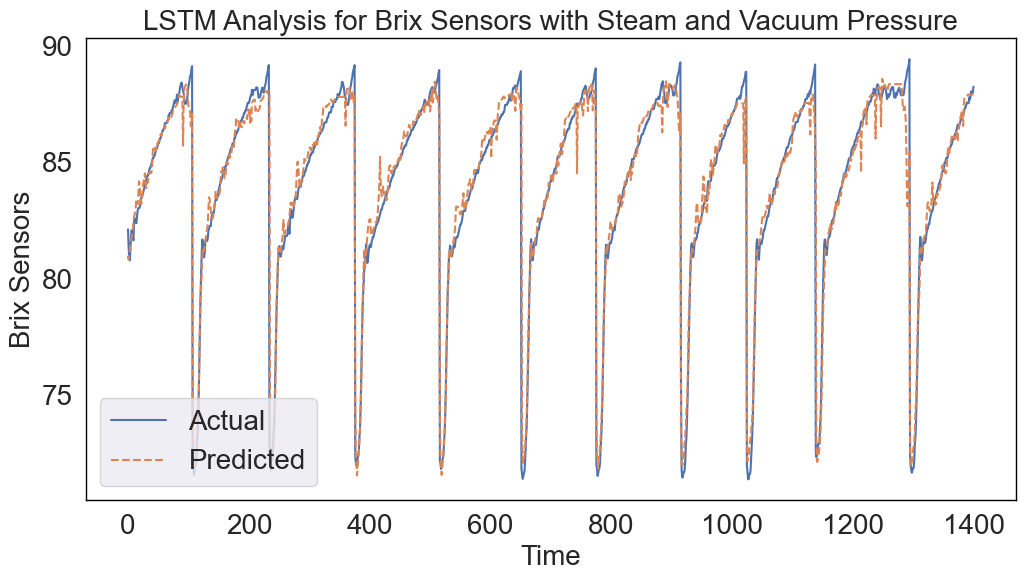

In [20]:

import matplotlib.pyplot as plt

# Plot the results up to the 1400th step
plt.figure(figsize=(12, 6))

# Set background to white
plt.gca().set_facecolor('white')

# Plotting actual vs predicted values
plt.plot(y_test[:1400], label='Actual')
plt.plot(y_pred[:1400], label='Predicted', linestyle='dashed')

plt.title('LSTM Analysis for Brix Sensors with Steam and Vacuum Pressure',fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Brix Sensors', fontsize=20)


# Set legend with specified font size
plt.legend(fontsize=20)

# Set font size of the numbers on the axes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# Add a black border around the plot
plt.gca().spines['top'].set_color('black')
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['right'].set_color('black')
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['left'].set_linewidth(1)
plt.show()



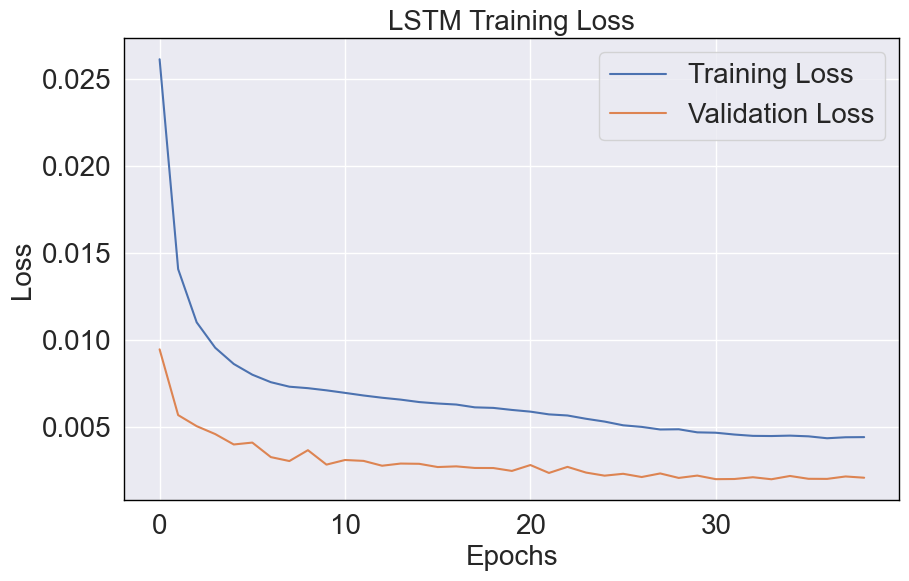

In [21]:
import matplotlib.pyplot as plt

# Plot training loss for LSTM
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Set labels and title with font size 20
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('LSTM Training Loss', fontsize=20)

# Set legend font size
plt.legend(fontsize=20)

# Set tick label font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Add a black border around the plot
plt.gca().spines['top'].set_color('black')
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['right'].set_color('black')
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['left'].set_linewidth(1)

# Show the plot
plt.show()


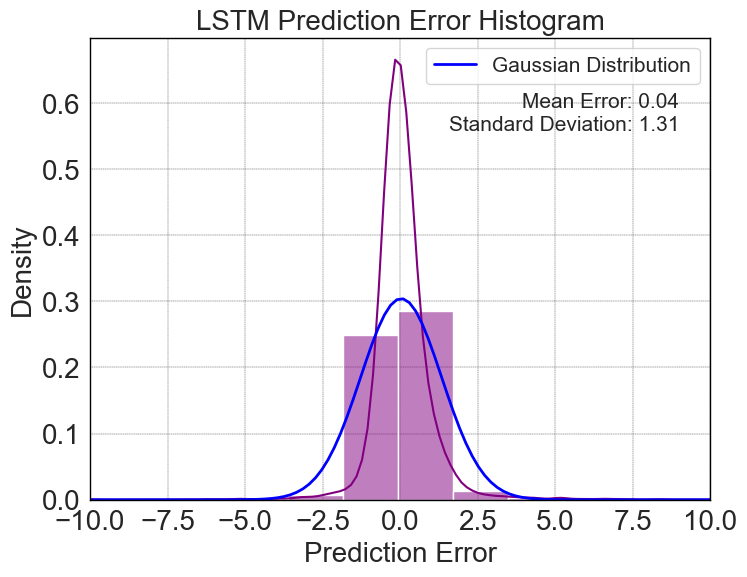

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Calculate prediction error (assuming y_test and y_pred are already defined)
error_lstm = y_test.flatten() - y_pred.flatten()

# Create a new figure for plotting
plt.figure(figsize=(8, 6))

# Plot histogram of prediction error
sns.histplot(error_lstm, bins=20, kde=True, color='purple', stat='density')

# Set background to white
plt.gca().set_facecolor('white')

# Calculate mean and standard deviation of the error for LSTM
mean_error_lstm = np.mean(error_lstm)
std_error_lstm = np.std(error_lstm)

# Generate values for Gaussian curve
x = np.linspace(-10, 10, 100)
pdf = norm.pdf(x, mean_error_lstm, std_error_lstm)  # Gaussian distribution

# Plot Gaussian distribution curve
plt.plot(x, pdf, 'b-', linewidth=2, label='Gaussian Distribution')

# Annotate with mean and standard deviation for LSTM
plt.text(0.95, 0.85, f'Mean Error: {mean_error_lstm:.2f}', fontsize=15, ha='right', transform=plt.gca().transAxes)
plt.text(0.95, 0.80, f'Standard Deviation: {std_error_lstm:.2f}', fontsize=15, ha='right', transform=plt.gca().transAxes)

# Set the x-axis limit from -10 to 10
plt.xlim(-10, 10)
plt.title('LSTM Prediction Error Histogram', fontsize=20)
plt.xlabel('Prediction Error', fontsize=20)
plt.ylabel('Density', fontsize=20)

# Add gridlines
plt.gca().set_xticks(np.arange(-10, 10.1, 2.5))
plt.gca().set_yticks(np.arange(0, plt.gca().get_ylim()[1], 0.1))
plt.grid(visible=True, color='black', linestyle='--', linewidth=0.25)

# Reduce tick label font size
plt.gca().tick_params(axis='both', which='major', labelsize=20)

# Add a legend
plt.legend(fontsize=15)

# Set a white background for the legend
legend = plt.legend(fontsize=15)
legend.get_frame().set_facecolor('white')

# Add a black border around the plot
for spine in plt.gca().spines.values():
    spine.set_color('black')
    spine.set_linewidth(1)

# Save the plot in the current directory with the file name 'lstm_prediction_error_histogram.png'
plt.savefig('lstm_prediction_error_histogram.png', bbox_inches='tight')

# Display the plot
plt.show()


# Adding Noise to Test Model Robustness

In [ ]:
# Function to add Gaussian noise
def add_noise(data, noise_factor):
    noise = np.random.normal(loc=0.0, scale=noise_factor, size=data.shape)
    return data + noise

# Adding noise to the scaled data
noise_factor = 0.04  # Adjust the noise factor to increase or decrease noise
data_noisy = add_noise(data_scaled, noise_factor)

# Make sure the noisy data stays within the original scale limits
data_noisy = np.clip(data_noisy, 0, 1)

# Create time series dataset with noisy data
X_noisy, y_noisy = create_dataset(data_noisy, look_back)

# Reshape the input data for LSTM
X_noisy = np.reshape(X_noisy, (X_noisy.shape[0], X_noisy.shape[1], X_noisy.shape[2]))

# Split the noisy data into training and testing sets
X_train_noisy, X_test_noisy = X_noisy[:train_size], X_noisy[train_size:]
y_train_noisy, y_test_noisy = y_noisy[:train_size], y_noisy[train_size:]

# Make predictions on the noisy test set
y_pred_noisy = model.predict(X_test_noisy).reshape(-1)
y_pred_noisy_3d = np.zeros(shape=(y_pred_noisy.shape[0], 3))
y_pred_noisy_3d[:, 0] = y_pred_noisy.copy()
y_pred_noisy = y_pred_noisy_3d
y_pred_noisy = scaler.inverse_transform(y_pred_noisy)[:, 0]

y_test_noisy_3d = np.zeros(shape=(y_test_noisy.shape[0], 3))
y_test_noisy_3d[:, 0] = y_test_noisy.copy()
y_test_noisy = y_test_noisy_3d
y_test_noisy = scaler.inverse_transform(y_test_noisy)[:, 0]

# Quantitative Evaluation on Noisy Data
mse_noisy = mean_squared_error(y_test_noisy, y_pred_noisy)
mae_noisy = mean_absolute_error(y_test_noisy, y_pred_noisy)
rmse_noisy = np.sqrt(mse_noisy)
r2_noisy = r2_score(y_test_noisy, y_pred_noisy)
mape_noisy = np.mean(np.abs((y_test_noisy - y_pred_noisy) / y_test_noisy)) * 100

print(f'Noisy Data - Mean Squared Error (MSE): {mse_noisy:.2f}')
print(f'Noisy Data - Mean Absolute Error (MAE): {mae_noisy:.2f}')
print(f'Noisy Data - Root Mean Squared Error (RMSE): {rmse_noisy:.2f}')
print(f'Noisy Data - R-squared (R2): {r2_noisy:.2f}')
print(f'Noisy Data - MAPE: {mape_noisy:.2f}')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from scipy.stats import norm, t
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming OWPTB is your dataset
data = OWPTB[['Brix sensors', 'Steam pressure', 'Vacuum pressure']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create time series data with lookback
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 1:])  # Features from index 1 onwards
        y.append(dataset[i + look_back, 0])  # Target 'Brix sensors'
    return np.array(X), np.array(y)

look_back = 10
X, y = create_dataset(data_scaled, look_back)

train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(units=16, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=16, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=16))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the model
model = create_lstm_model()
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=0)

# Make predictions
y_pred = model.predict(X_test).reshape(-1)

# Bootstrapping
n_iterations = 1000
n_size = len(X_test)
bootstrap_stats = []

for i in range(n_iterations):
    indices = np.random.randint(0, n_size, n_size)
    X_sample, y_sample = X_test[indices], y_test[indices]
    
    y_sample_pred = model.predict(X_sample).reshape(-1)
    
    mse = mean_squared_error(y_sample, y_sample_pred)
    mae = mean_absolute_error(y_sample, y_sample_pred)
    r2 = r2_score(y_sample, y_sample_pred)
    
    bootstrap_stats.append([mse, mae, r2])

bootstrap_stats = np.array(bootstrap_stats)
mse_mean, mae_mean, r2_mean = np.mean(bootstrap_stats, axis=0)
mse_std, mae_std, r2_std = np.std(bootstrap_stats, axis=0)

# Calculate confidence intervals
alpha = 0.95
p = ((1.0 - alpha) / 2.0) * 100
lower_p = np.percentile(bootstrap_stats, p, axis=0)
upper_p = np.percentile(bootstrap_stats, 100 - p, axis=0)

# Output results
print(f'MSE: {mse_mean:.3f} [{lower_p[0]:.3f}, {upper_p[0]:.3f}]')
print(f'MAE: {mae_mean:.3f} [{lower_p[1]:.3f}, {upper_p[1]:.3f}]')
print(f'R2: {r2_mean:.3f} [{lower_p[2]:.3f}, {upper_p[2]:.3f}]')

# Plot histograms of bootstrap results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(bootstrap_stats[:, 0], kde=True, color='purple', stat='density')
plt.title('MSE Distribution')
plt.xlabel('MSE')

plt.subplot(1, 3, 2)
sns.histplot(bootstrap_stats[:, 1], kde=True, color='blue', stat='density')
plt.title('MAE Distribution')
plt.xlabel('MAE')

plt.subplot(1, 3, 3)
sns.histplot(bootstrap_stats[:, 2], kde=True, color='green', stat='density')
plt.title('R2 Distribution')
plt.xlabel('R2')

plt.tight_layout()
plt.show()


# GRU

In [24]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.model_selection import train_test_split

# Assuming OWPTB is your dataset
# Extract the relevant features
data = OWPTB[['Brix sensors', 'Steam pressure', 'Vacuum pressure']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create time series data with lookback
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 1:])  # Features from index 1 onwards
        y.append(dataset[i + look_back, 0])  # Target 'Brix sensors'
    return np.array(X), np.array(y)

# Define the lookback window
look_back = 10

# Create the time series dataset
X, y = create_dataset(data_scaled, look_back)

# Split the data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Build the GRU model with added complexity and regularization
gru_model = Sequential()
gru_model.add(GRU(units=32, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
gru_model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
gru_model.add(GRU(units=32, return_sequences=True))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(units=16))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(units=1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

history = gru_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop])

# Make predictions on the test set
y_pred_gru = gru_model.predict(X_test).reshape(-1)

# Inverse scale the predictions and the true values
y_pred_gru_3d = np.zeros(shape=(y_pred_gru.shape[0], 3))
y_pred_gru_3d[:, 0] = y_pred_gru.copy()
y_pred_gru_original = scaler.inverse_transform(y_pred_gru_3d)[:, 0]

y_test_3d = np.zeros(shape=(y_test.shape[0], 3))
y_test_3d[:, 0] = y_test.copy()
y_test_original = scaler.inverse_transform(y_test_3d)[:, 0]

# Quantitative Evaluation
mse_gru = mean_squared_error(y_test_original, y_pred_gru_original)
mae_gru = mean_absolute_error(y_test_original, y_pred_gru_original)
rmse_gru = np.sqrt(mse_gru)
r2_gru = r2_score(y_test_original, y_pred_gru_original)
mape_gru = np.mean(np.abs((y_test_original - y_pred_gru_original) / y_test_original)) * 100

print(f'GRU - Mean Squared Error (MSE): {mse_gru:.2f}')
print(f'GRU - Mean Absolute Error (MAE): {mae_gru:.2f}')
print(f'GRU - Root Mean Squared Error (RMSE): {rmse_gru:.2f}')
print(f'GRU - R-squared (R2): {r2_gru:.2f}')
print(f'GRU - MAPE: {mape_gru:.2f}')


Epoch 1/50


C:\Users\morebo\AppData\Local\anaconda3\envs\NordZucker\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


903/903 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - loss: 0.0301 - val_loss: 0.0091
Epoch 2/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - loss: 0.0119 - val_loss: 0.0075
Epoch 3/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 0.0088 - val_loss: 0.0070
Epoch 4/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - loss: 0.0081 - val_loss: 0.0064
Epoch 5/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - loss: 0.0068 - val_loss: 0.0059
Epoch 6/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - loss: 0.0064 - val_loss: 0.0055
Epoch 7/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 0.0061 - val_loss: 0.0053
Epoch 8/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 9/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 0.0054 - val_loss: 0.0050
Epoch 10/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - loss: 0.0054 - val_loss: 0.0050
Epoch 11/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - loss: 0.0055 - val_loss: 0.0049
Epoch 12/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 

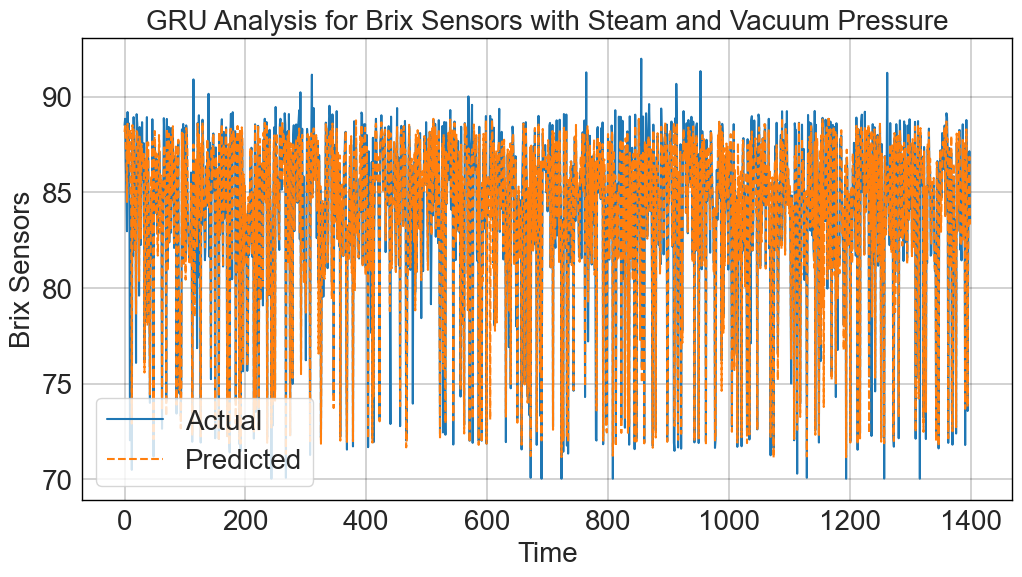

In [28]:
import matplotlib.pyplot as plt

# Plot the results up to the 1400th step for GRU model
plt.figure(figsize=(12, 6))

# Set background to white
plt.gca().set_facecolor('white')

# Plotting actual vs predicted values for GRU
plt.plot(y_test_original[:1400], label='Actual')
plt.plot(y_pred_gru_original[:1400], label='Predicted', linestyle='dashed')

# Update the title for GRU
plt.title('GRU Analysis for Brix Sensors with Steam and Vacuum Pressure', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Brix Sensors', fontsize=20)

# Set legend with specified font size and white background
plt.legend(fontsize=20, facecolor='white')

# Set font size of the numbers on the axes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Add a black border around the plot
plt.gca().spines['top'].set_color('black')
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['right'].set_color('black')
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['left'].set_linewidth(1)

# Add black gridlines
plt.grid(True, color='black', linestyle='-', linewidth=0.25)

# Show the plot
plt.show()


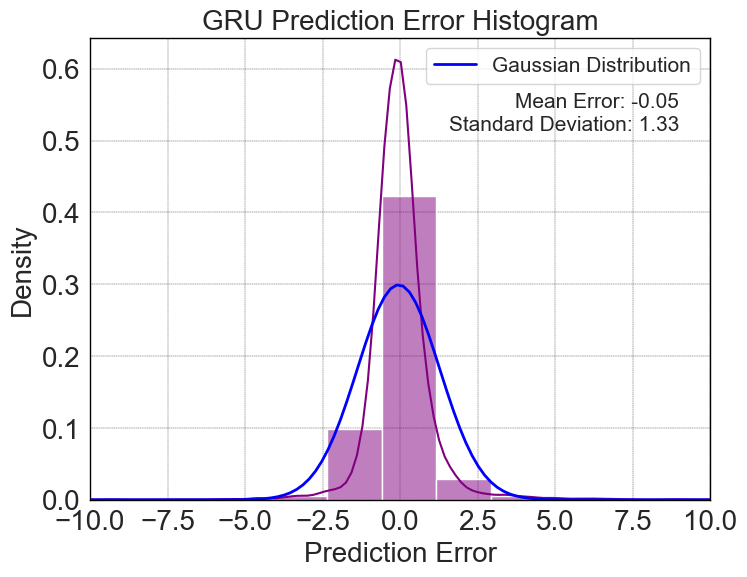

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calculate prediction error for GRU
error_gru = y_test_original.flatten() - y_pred_gru_original.flatten()

# Create a new figure for the histogram
plt.figure(figsize=(8, 6))

# Plotting the histogram for GRU prediction error
sns.histplot(error_gru, bins=20, kde=True, color='purple', stat='density')

# Set background to white
plt.gca().set_facecolor('white')

# Calculate mean and standard deviation of the error for GRU
mean_error_gru = np.mean(error_gru)
std_error_gru = np.std(error_gru)

# Generate values for Gaussian curve
x = np.linspace(-10, 10, 100)
pdf = norm.pdf(x, mean_error_gru, std_error_gru)  # Gaussian distribution

# Plot Gaussian distribution curve for GRU
plt.plot(x, pdf, 'b-', linewidth=2, label='Gaussian Distribution')

# Annotate with mean and standard deviation for GRU
plt.text(0.95, 0.85, f'Mean Error: {mean_error_gru:.2f}', fontsize=15, ha='right', transform=plt.gca().transAxes)
plt.text(0.95, 0.80, f'Standard Deviation: {std_error_gru:.2f}', fontsize=15, ha='right', transform=plt.gca().transAxes)

# Set x-axis limit from -10 to 10
plt.xlim(-10, 10)

# Title and axis labels
plt.title('GRU Prediction Error Histogram', fontsize=20)
plt.xlabel('Prediction Error', fontsize=20)
plt.ylabel('Density', fontsize=20)

# Add black gridlines
plt.gca().set_xticks(np.arange(-10, 10.1, 2.5))  # Gridlines every 2.5 on the x-axis
plt.gca().set_yticks(np.arange(0, plt.gca().get_ylim()[1], 0.1))  # Gridlines every 0.1 on the y-axis
plt.grid(visible=True, color='black', linestyle='--', linewidth=0.25)

# Reduce tick label font size
plt.gca().tick_params(axis='both', which='major', labelsize=20)

# Add a legend with a white background
legend = plt.legend(fontsize=15)
legend.get_frame().set_facecolor('white')  # Set legend background to white

# Add a black border around the plot
plt.gca().spines['top'].set_color('black')
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['right'].set_color('black')
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['left'].set_linewidth(1)

# Save the plot in the current directory with the file name 'lstm_prediction_error_histogram.png'
plt.savefig('GRU_prediction_error_histogram.png', bbox_inches='tight')

# Show the plot
plt.show()


# CNN

In [52]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import norm
import seaborn as sns
from sklearn.model_selection import train_test_split

# Assuming OWPTB is your dataset
# Extract the relevant features
data = OWPTB[['Brix sensors', 'Steam pressure', 'Vacuum pressure']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create time series data with lookback
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 1:])  # Features from index 1 onwards
        y.append(dataset[i + look_back, 0])  # Target 'Brix sensors'
    return np.array(X), np.array(y)

# Define the lookback window
look_back = 10

# Create the time series dataset
X, y = create_dataset(data_scaled, look_back)

# Split the data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Build the LSTM model with added complexity and regularization
model = Sequential()
model.add(LSTM(units=32, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(LSTM(units=32, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=16))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop])

# Make predictions on the test set
y_pred = model.predict(X_test).reshape(-1)
y_pred_3d = np.zeros(shape=(y_pred.shape[0], 3))
y_pred_3d[:, 0] = y_pred.copy()
y_pred = scaler.inverse_transform(y_pred_3d)[:, 0]

y_test_3d = np.zeros(shape=(y_test.shape[0], 3))
y_test_3d[:, 0] = y_test.copy()
y_test = scaler.inverse_transform(y_test_3d)[:, 0]

# Quantitative Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'MAPE: {mape:.2f}')

Epoch 1/50


C:\Users\morebo\AppData\Local\anaconda3\envs\NordZucker\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


903/903 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0459 - val_loss: 0.0104
Epoch 2/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0137 - val_loss: 0.0082
Epoch 3/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.0097 - val_loss: 0.0072
Epoch 4/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0079 - val_loss: 0.0063
Epoch 5/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0069 - val_loss: 0.0059
Epoch 6/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0064 - val_loss: 0.0056
Epoch 7/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0063 - val_loss: 0.0054
Epoch 8/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0058 - val_loss: 0.0052
Epoch 9/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0058 - val_loss: 0.0052
Epoch 10/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0057 - val_loss: 0.0050
Epoch 11/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0055 - val_loss: 0.0049
Epoch 12/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 

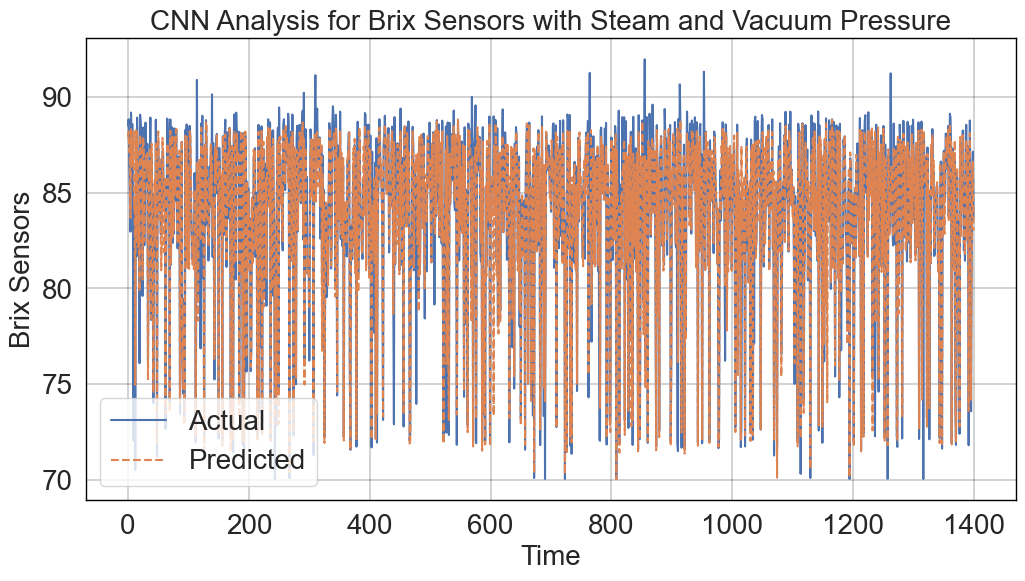

In [50]:
import matplotlib.pyplot as plt

# Plot the results up to the 1400th step for CNN model
plt.figure(figsize=(12, 6))

# Set background to white
plt.gca().set_facecolor('white')

# Plotting actual vs predicted values for CNN
plt.plot(y_test[:1400], label='Actual')
plt.plot(y_pred[:1400], label='Predicted', linestyle='dashed')

# Update the title for CNN
plt.title('CNN Analysis for Brix Sensors with Steam and Vacuum Pressure', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Brix Sensors', fontsize=20)

# Set legend with specified font size and white background
plt.legend(fontsize=20, facecolor='white')

# Set font size of the numbers on the axes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Add a black border around the plot
plt.gca().spines['top'].set_color('black')
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['right'].set_color('black')
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['left'].set_linewidth(1)

# Add black gridlines
plt.grid(True, color='black', linestyle='-', linewidth=0.25)

# Show the plot
plt.show()


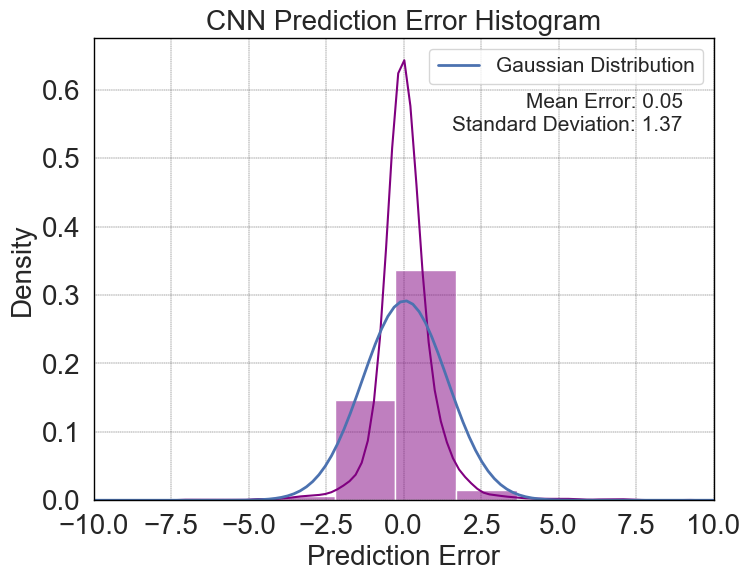

In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calculate prediction error for CNN
error_cnn = y_test.flatten() - y_pred.flatten()

# Create a new figure for the histogram
plt.figure(figsize=(8, 6))

# Plotting the histogram for CNN prediction error
sns.histplot(error_cnn, bins=20, kde=True, color='purple', stat='density')

# Set background to white
plt.gca().set_facecolor('white')

# Calculate mean and standard deviation of the error for CNN
mean_error_cnn = np.mean(error_cnn)
std_error_cnn = np.std(error_cnn)

# Generate values for Gaussian curve
x = np.linspace(-10, 10, 100)
pdf = norm.pdf(x, mean_error_cnn, std_error_cnn)  # Gaussian distribution

# Plot Gaussian distribution curve for CNN
plt.plot(x, pdf, 'b-', linewidth=2, label='Gaussian Distribution')

# Annotate with mean and standard deviation for CNN
plt.text(0.95, 0.85, f'Mean Error: {mean_error_cnn:.2f}', fontsize=15, ha='right', transform=plt.gca().transAxes)
plt.text(0.95, 0.80, f'Standard Deviation: {std_error_cnn:.2f}', fontsize=15, ha='right', transform=plt.gca().transAxes)

# Set x-axis limit from -10 to 10
plt.xlim(-10, 10)

# Title and axis labels
plt.title('CNN Prediction Error Histogram', fontsize=20)
plt.xlabel('Prediction Error', fontsize=20)
plt.ylabel('Density', fontsize=20)

# Add black gridlines
plt.gca().set_xticks(np.arange(-10, 10.1, 2.5))  # Gridlines every 2.5 on the x-axis
plt.gca().set_yticks(np.arange(0, plt.gca().get_ylim()[1], 0.1))  # Gridlines every 0.1 on the y-axis
plt.grid(visible=True, color='black', linestyle='--', linewidth=0.25)

# Reduce tick label font size
plt.gca().tick_params(axis='both', which='major', labelsize=20)

# Add a legend with a white background
legend = plt.legend(fontsize=15)
legend.get_frame().set_facecolor('white')  # Set legend background to white

# Add a black border around the plot
plt.gca().spines['top'].set_color('black')
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['right'].set_color('black')
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['left'].set_linewidth(1)
plt.savefig('CNN_prediction_error_histogram.png', bbox_inches='tight')
# Show the plot
plt.show()
